### 2021_10_27_4

In [4]:
import seaborn as sns
import pandas as pd

In [5]:
train = pd.read_csv("../CSV/santander-customer-satisfaction/train.csv", encoding='latin-1')
test = pd.read_csv("../CSV/santander-customer-satisfaction/test.csv", encoding='latin-1')
sub = pd.read_csv("../CSV/santander-customer-satisfaction/sample_submission.csv")

In [6]:
print("train shape :", train.shape)
print("test shape :", test.shape)
print("sub shape :", sub.shape)

train shape : (76020, 371)
test shape : (75818, 370)
sub shape : (75818, 2)


In [7]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [8]:
test.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

* 우리가 예측할 레이블은 "TARGET"이다.
* 370개의 대부분의 피처가 익명처리가 되어 있다.
* 고객의 불만족, 만족의 예측 모델을 만들어서, 불만족 고객을 식별하는데 목표가 있다.

In [9]:
train["TARGET"].unique() # 이진분류

array([0, 1])

In [10]:
train["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


* float64 : 실수형 - 111개 컬럼, int64 : 정수형 - 260개

### 전체 데이터의 만족(0), 불만족(1) 비율

<AxesSubplot:xlabel='TARGET', ylabel='count'>

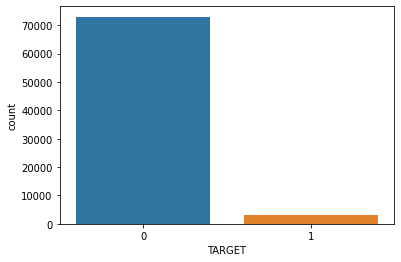

In [12]:
sns.countplot(x = "TARGET", data = train)

In [13]:
train["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [14]:
unsatified = train['TARGET'].value_counts()[1]
unsatified / train['TARGET'].count()  # 비율

0.0395685345961589

### 결측치 확인

In [15]:
train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [16]:
train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [18]:
summary = train.describe()
type(summary)

print( summary.loc["min", :].min(), summary.loc["min", :].max() )
print( summary.loc["max", :].min(), summary.loc["max", :].max() )
print( summary.loc["count", :].min(), summary.loc["count", :].max() )
print( summary.loc["mean", :].min(), summary.loc["mean", :].max() )

-999999.0 5163.75
0.0 9999999999.0
76020.0 76020.0
-1523.1992765061825 48671402.23587235


* var3의 최솟값이 -999999로 이상치로 보임

In [19]:
train["var3"].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

### 이상치 또는 결측치가 발생시
* 없애버리기
* 값이 너무 큰 경우 -> 가장 큰 값
* 값이 너무 작은 경우 -> 가장 작은 값
* 빈값 - 왜 비어 있는 값이 발생했는가? -> 데이터를 누락했다. 앞의 데이터로 결측치를 채우거나, 또는 앞의 7일 정도 데이터로 채운다.
* 빈값 -> 평균값, 최빈값, 중앙값으로 채우기
* 이상치만을 예측하는 모델을 만들어서 채우기

In [20]:
# 컬럼 중에 가장 많이 나온 값으로 대체한다.
train["var3"].replace(-999999, 2, inplace = True)

In [21]:
train.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [22]:
# ID 열을 제외
# train.drop("ID", axis = 1, inplace = True)
train = train.loc[:, "var3":]
train.head(3)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# 피처와 레이블 지정
X = train.iloc[:, :-1] # 가장 마지막 "TARGET" 컬럼을 제외하고 모두 선택
y = train["TARGET"]

print("X shape :", X.shape)
print("y shape :", y.shape)

X shape : (76020, 369)
y shape : (76020,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                   random_state = 0)

In [26]:
## 레이블 분포비율
print("학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count())
print("테스트용 레이블 분포 비율 : \n" , y_test.value_counts() / y_test.count())

학습용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### xgboost 설치
* pip install xgboost -> mac에서 설치는 되지만 학습이 되지 않음(version : 1.5)
* conda install -c conda-forge xgboost -> 해결

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [28]:
print(xgb.__version__)

1.3.3


In [29]:
xgb_model = XGBClassifier(n_estimators = 500, random_state = 77)
xgb_model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              random_state=77, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [30]:
xgb_model.fit(X_train, y_train, 
              early_stopping_rounds = 100, 
              eval_metric = "auc", 
              eval_set = [(X_train, y_train), (X_test, y_test)])

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=77,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# 0, 1
# 0이 될 확률, 1이 될 확률

In [33]:
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob[:10]

array([0.00643863, 0.02387667, 0.01260844, 0.01592306, 0.01641693,
       0.00643863, 0.00618323, 0.01146051, 0.02199604, 0.0668072 ],
      dtype=float32)

In [34]:
xgb_roc_score = roc_auc_score(y_test, pred_prob, average = "macro")
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8413


### 하이퍼 파라미터 튜닝

* max_depth, min_child_weight, colsample_bytree
* 먼저 2-3개 정도의 파라미터를 최적화 시킨 후, 최적 파라미터를 기반으로 1-2개의 파라미터를 결합하여 튜닝을 수행

In [36]:
%%time

from sklearn.model_selection import GridSearchCV

# 우선 하이퍼 파라미터 수행 속도를 향상을 위해 100으로
xgb_model1 = XGBClassifier(n_estimators=100, 
                           use_label_encoder=False, 
                           n_jobs = -1) # n_jobs = -1 : 코어 모두 사용

params = {"max_depth":[3, 5,7],
          "min_child_weight":[1,3],
          "colsample_bytree":[0.3, 0.5, 0.75]}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.67967	validation_1-auc:0.68814
[1]	validation_0-auc:0.70809	validation_1-auc:0.71640
[2]	validation_0-auc:0.77468	validation_1-auc:0.78451
[3]	validation_0-auc:0.78674	validation_1-auc:0.79441
[4]	validation_0-auc:0.78773	validation_1-auc:0.79629
[5]	validation_0-auc:0.80334	validation_1-auc:0.80650
[6]	validation_0-auc:0.80112	validation_1-auc:0.80716
[7]	validation_0-auc:0.81315	validation_1-auc:0.81754
[8]	validation_0-auc:0.81269	validation_1-auc:0.81688
[9]	validation_0-auc:0.80733	validation_1-auc:0.81250
[10]	validation_0-auc:0.81869	validation_1-auc:0.82067
[11]	validation_0-auc:0.81742	validation_1-auc:0.81837
[12]	validation_0-auc:0.81649	validation_1-auc:0.81794
[13]	validation_0-auc:0.82059	validation_1-auc:0.82163
[14]	validation_0-auc:0.82205	validation_1-auc:0.82317
[15]	validation_0-auc:0.82205	validation_1-auc:0.82171
[16]	validation_0-auc:0.82248	validation_1-auc:0.82273
[17]	validation_0-auc:0.83088	validation_1-auc:0.82946
[18]	validation_0-au

[89]	validation_0-auc:0.86459	validation_1-auc:0.84042
[90]	validation_0-auc:0.86457	validation_1-auc:0.84049
[91]	validation_0-auc:0.86462	validation_1-auc:0.84035
[92]	validation_0-auc:0.86469	validation_1-auc:0.84035
[0]	validation_0-auc:0.69904	validation_1-auc:0.70168
[1]	validation_0-auc:0.71497	validation_1-auc:0.71929
[2]	validation_0-auc:0.78453	validation_1-auc:0.79347
[3]	validation_0-auc:0.80494	validation_1-auc:0.80775
[4]	validation_0-auc:0.80057	validation_1-auc:0.80787
[5]	validation_0-auc:0.80958	validation_1-auc:0.81143
[6]	validation_0-auc:0.80960	validation_1-auc:0.81293
[7]	validation_0-auc:0.81981	validation_1-auc:0.82558
[8]	validation_0-auc:0.81776	validation_1-auc:0.82017
[9]	validation_0-auc:0.81438	validation_1-auc:0.81864
[10]	validation_0-auc:0.82599	validation_1-auc:0.82832
[11]	validation_0-auc:0.82240	validation_1-auc:0.82454
[12]	validation_0-auc:0.82411	validation_1-auc:0.82566
[13]	validation_0-auc:0.82452	validation_1-auc:0.82676
[14]	validation_0-au

[19]	validation_0-auc:0.83344	validation_1-auc:0.83405
[20]	validation_0-auc:0.83350	validation_1-auc:0.83388
[21]	validation_0-auc:0.83815	validation_1-auc:0.83739
[22]	validation_0-auc:0.83919	validation_1-auc:0.83706
[23]	validation_0-auc:0.84030	validation_1-auc:0.83728
[24]	validation_0-auc:0.84111	validation_1-auc:0.83808
[25]	validation_0-auc:0.84270	validation_1-auc:0.83925
[26]	validation_0-auc:0.84533	validation_1-auc:0.84146
[27]	validation_0-auc:0.84594	validation_1-auc:0.84180
[28]	validation_0-auc:0.84704	validation_1-auc:0.84278
[29]	validation_0-auc:0.84765	validation_1-auc:0.84251
[30]	validation_0-auc:0.84796	validation_1-auc:0.84257
[31]	validation_0-auc:0.84823	validation_1-auc:0.84279
[32]	validation_0-auc:0.84874	validation_1-auc:0.84305
[33]	validation_0-auc:0.84911	validation_1-auc:0.84297
[34]	validation_0-auc:0.84983	validation_1-auc:0.84300
[35]	validation_0-auc:0.85015	validation_1-auc:0.84254
[36]	validation_0-auc:0.85108	validation_1-auc:0.84274
[37]	valid

[35]	validation_0-auc:0.87212	validation_1-auc:0.83690
[36]	validation_0-auc:0.87277	validation_1-auc:0.83709
[37]	validation_0-auc:0.87300	validation_1-auc:0.83725
[38]	validation_0-auc:0.87357	validation_1-auc:0.83735
[39]	validation_0-auc:0.87356	validation_1-auc:0.83693
[40]	validation_0-auc:0.87382	validation_1-auc:0.83633
[41]	validation_0-auc:0.87391	validation_1-auc:0.83592
[42]	validation_0-auc:0.87429	validation_1-auc:0.83547
[43]	validation_0-auc:0.87444	validation_1-auc:0.83556
[44]	validation_0-auc:0.87456	validation_1-auc:0.83536
[45]	validation_0-auc:0.87558	validation_1-auc:0.83574
[46]	validation_0-auc:0.87583	validation_1-auc:0.83549
[47]	validation_0-auc:0.87613	validation_1-auc:0.83544
[48]	validation_0-auc:0.87623	validation_1-auc:0.83529
[49]	validation_0-auc:0.87653	validation_1-auc:0.83481
[50]	validation_0-auc:0.87667	validation_1-auc:0.83495
[51]	validation_0-auc:0.87736	validation_1-auc:0.83469
[52]	validation_0-auc:0.87757	validation_1-auc:0.83422
[53]	valid

[8]	validation_0-auc:0.83053	validation_1-auc:0.82512
[9]	validation_0-auc:0.82766	validation_1-auc:0.82279
[10]	validation_0-auc:0.83880	validation_1-auc:0.83239
[11]	validation_0-auc:0.83918	validation_1-auc:0.83060
[12]	validation_0-auc:0.83747	validation_1-auc:0.82966
[13]	validation_0-auc:0.83886	validation_1-auc:0.82973
[14]	validation_0-auc:0.83893	validation_1-auc:0.82865
[15]	validation_0-auc:0.83866	validation_1-auc:0.82761
[16]	validation_0-auc:0.83869	validation_1-auc:0.82791
[17]	validation_0-auc:0.84520	validation_1-auc:0.83362
[18]	validation_0-auc:0.84644	validation_1-auc:0.83275
[19]	validation_0-auc:0.84703	validation_1-auc:0.83235
[20]	validation_0-auc:0.84688	validation_1-auc:0.83131
[21]	validation_0-auc:0.85222	validation_1-auc:0.83457
[22]	validation_0-auc:0.85291	validation_1-auc:0.83332
[23]	validation_0-auc:0.85288	validation_1-auc:0.83330
[24]	validation_0-auc:0.85340	validation_1-auc:0.83348
[25]	validation_0-auc:0.85610	validation_1-auc:0.83463
[26]	validat

[30]	validation_0-auc:0.86696	validation_1-auc:0.83660
[31]	validation_0-auc:0.86717	validation_1-auc:0.83691
[32]	validation_0-auc:0.86731	validation_1-auc:0.83696
[33]	validation_0-auc:0.86812	validation_1-auc:0.83705
[34]	validation_0-auc:0.86954	validation_1-auc:0.83682
[35]	validation_0-auc:0.86987	validation_1-auc:0.83678
[36]	validation_0-auc:0.87132	validation_1-auc:0.83648
[37]	validation_0-auc:0.87156	validation_1-auc:0.83639
[38]	validation_0-auc:0.87301	validation_1-auc:0.83612
[39]	validation_0-auc:0.87350	validation_1-auc:0.83651
[40]	validation_0-auc:0.87355	validation_1-auc:0.83653
[41]	validation_0-auc:0.87396	validation_1-auc:0.83675
[42]	validation_0-auc:0.87439	validation_1-auc:0.83713
[43]	validation_0-auc:0.87453	validation_1-auc:0.83689
[44]	validation_0-auc:0.87480	validation_1-auc:0.83667
[45]	validation_0-auc:0.87541	validation_1-auc:0.83677
[46]	validation_0-auc:0.87585	validation_1-auc:0.83682
[47]	validation_0-auc:0.87593	validation_1-auc:0.83697
[48]	valid

[7]	validation_0-auc:0.84971	validation_1-auc:0.83381
[8]	validation_0-auc:0.85208	validation_1-auc:0.83322
[9]	validation_0-auc:0.85002	validation_1-auc:0.83138
[10]	validation_0-auc:0.85750	validation_1-auc:0.83635
[11]	validation_0-auc:0.85995	validation_1-auc:0.83439
[12]	validation_0-auc:0.86062	validation_1-auc:0.83356
[13]	validation_0-auc:0.86027	validation_1-auc:0.83132
[14]	validation_0-auc:0.86212	validation_1-auc:0.83007
[15]	validation_0-auc:0.86242	validation_1-auc:0.82818
[16]	validation_0-auc:0.86326	validation_1-auc:0.82670
[17]	validation_0-auc:0.86934	validation_1-auc:0.83292
[18]	validation_0-auc:0.87125	validation_1-auc:0.83071
[19]	validation_0-auc:0.87224	validation_1-auc:0.83105
[20]	validation_0-auc:0.87249	validation_1-auc:0.83111
[21]	validation_0-auc:0.87753	validation_1-auc:0.83434
[22]	validation_0-auc:0.87791	validation_1-auc:0.83363
[23]	validation_0-auc:0.87818	validation_1-auc:0.83321
[24]	validation_0-auc:0.87865	validation_1-auc:0.83278
[25]	validati

[60]	validation_0-auc:0.89354	validation_1-auc:0.83377
[61]	validation_0-auc:0.89360	validation_1-auc:0.83392
[62]	validation_0-auc:0.89374	validation_1-auc:0.83338
[63]	validation_0-auc:0.89377	validation_1-auc:0.83296
[64]	validation_0-auc:0.89392	validation_1-auc:0.83245
[65]	validation_0-auc:0.89456	validation_1-auc:0.83210
[66]	validation_0-auc:0.89469	validation_1-auc:0.83209
[67]	validation_0-auc:0.89506	validation_1-auc:0.83187
[68]	validation_0-auc:0.89538	validation_1-auc:0.83183
[69]	validation_0-auc:0.89598	validation_1-auc:0.83145
[70]	validation_0-auc:0.89617	validation_1-auc:0.83139
[71]	validation_0-auc:0.89611	validation_1-auc:0.83134
[72]	validation_0-auc:0.89634	validation_1-auc:0.83123
[73]	validation_0-auc:0.89642	validation_1-auc:0.83087
[74]	validation_0-auc:0.89745	validation_1-auc:0.83116
[75]	validation_0-auc:0.89773	validation_1-auc:0.83133
[76]	validation_0-auc:0.89775	validation_1-auc:0.83116
[77]	validation_0-auc:0.89771	validation_1-auc:0.83119
[78]	valid

[16]	validation_0-auc:0.84070	validation_1-auc:0.83808
[17]	validation_0-auc:0.84278	validation_1-auc:0.83821
[18]	validation_0-auc:0.84368	validation_1-auc:0.83791
[19]	validation_0-auc:0.84430	validation_1-auc:0.83840
[20]	validation_0-auc:0.84504	validation_1-auc:0.83838
[21]	validation_0-auc:0.84667	validation_1-auc:0.83976
[22]	validation_0-auc:0.84725	validation_1-auc:0.84009
[23]	validation_0-auc:0.84806	validation_1-auc:0.84022
[24]	validation_0-auc:0.84855	validation_1-auc:0.84051
[25]	validation_0-auc:0.84933	validation_1-auc:0.84085
[26]	validation_0-auc:0.84963	validation_1-auc:0.84098
[27]	validation_0-auc:0.85046	validation_1-auc:0.84158
[28]	validation_0-auc:0.85111	validation_1-auc:0.84211
[29]	validation_0-auc:0.85153	validation_1-auc:0.84190
[30]	validation_0-auc:0.85187	validation_1-auc:0.84225
[31]	validation_0-auc:0.85247	validation_1-auc:0.84213
[32]	validation_0-auc:0.85334	validation_1-auc:0.84190
[33]	validation_0-auc:0.85346	validation_1-auc:0.84192
[34]	valid

[21]	validation_0-auc:0.84278	validation_1-auc:0.83740
[22]	validation_0-auc:0.84356	validation_1-auc:0.83750
[23]	validation_0-auc:0.84411	validation_1-auc:0.83797
[24]	validation_0-auc:0.84471	validation_1-auc:0.83777
[25]	validation_0-auc:0.84594	validation_1-auc:0.83750
[26]	validation_0-auc:0.84669	validation_1-auc:0.83744
[27]	validation_0-auc:0.84690	validation_1-auc:0.83763
[28]	validation_0-auc:0.84731	validation_1-auc:0.83786
[29]	validation_0-auc:0.84778	validation_1-auc:0.83848
[30]	validation_0-auc:0.84873	validation_1-auc:0.83815
[31]	validation_0-auc:0.84899	validation_1-auc:0.83803
[32]	validation_0-auc:0.84898	validation_1-auc:0.83786
[33]	validation_0-auc:0.84952	validation_1-auc:0.83796
[34]	validation_0-auc:0.85001	validation_1-auc:0.83821
[35]	validation_0-auc:0.85043	validation_1-auc:0.83776
[36]	validation_0-auc:0.85054	validation_1-auc:0.83788
[37]	validation_0-auc:0.85074	validation_1-auc:0.83820
[38]	validation_0-auc:0.85136	validation_1-auc:0.83769
[39]	valid

[43]	validation_0-auc:0.85392	validation_1-auc:0.84243
[44]	validation_0-auc:0.85442	validation_1-auc:0.84160
[45]	validation_0-auc:0.85455	validation_1-auc:0.84147
[46]	validation_0-auc:0.85479	validation_1-auc:0.84125
[47]	validation_0-auc:0.85501	validation_1-auc:0.84135
[48]	validation_0-auc:0.85528	validation_1-auc:0.84104
[49]	validation_0-auc:0.85560	validation_1-auc:0.84092
[50]	validation_0-auc:0.85571	validation_1-auc:0.84100
[51]	validation_0-auc:0.85628	validation_1-auc:0.84095
[52]	validation_0-auc:0.85673	validation_1-auc:0.84100
[53]	validation_0-auc:0.85698	validation_1-auc:0.84047
[54]	validation_0-auc:0.85716	validation_1-auc:0.84047
[55]	validation_0-auc:0.85751	validation_1-auc:0.84091
[56]	validation_0-auc:0.85774	validation_1-auc:0.84109
[57]	validation_0-auc:0.85803	validation_1-auc:0.84081
[58]	validation_0-auc:0.85823	validation_1-auc:0.84072
[59]	validation_0-auc:0.85835	validation_1-auc:0.84108
[60]	validation_0-auc:0.85850	validation_1-auc:0.84086
[61]	valid

[13]	validation_0-auc:0.85683	validation_1-auc:0.83850
[14]	validation_0-auc:0.85794	validation_1-auc:0.83859
[15]	validation_0-auc:0.86034	validation_1-auc:0.83965
[16]	validation_0-auc:0.86123	validation_1-auc:0.83938
[17]	validation_0-auc:0.86299	validation_1-auc:0.84058
[18]	validation_0-auc:0.86450	validation_1-auc:0.84066
[19]	validation_0-auc:0.86506	validation_1-auc:0.84016
[20]	validation_0-auc:0.86571	validation_1-auc:0.84030
[21]	validation_0-auc:0.86687	validation_1-auc:0.84011
[22]	validation_0-auc:0.86722	validation_1-auc:0.84008
[23]	validation_0-auc:0.86828	validation_1-auc:0.83988
[24]	validation_0-auc:0.86862	validation_1-auc:0.84037
[25]	validation_0-auc:0.87018	validation_1-auc:0.83904
[26]	validation_0-auc:0.87113	validation_1-auc:0.83818
[27]	validation_0-auc:0.87190	validation_1-auc:0.83807
[28]	validation_0-auc:0.87273	validation_1-auc:0.83888
[29]	validation_0-auc:0.87333	validation_1-auc:0.83905
[30]	validation_0-auc:0.87372	validation_1-auc:0.83911
[31]	valid

[15]	validation_0-auc:0.85641	validation_1-auc:0.84079
[16]	validation_0-auc:0.85692	validation_1-auc:0.84118
[17]	validation_0-auc:0.85953	validation_1-auc:0.84080
[18]	validation_0-auc:0.86083	validation_1-auc:0.84062
[19]	validation_0-auc:0.86134	validation_1-auc:0.84072
[20]	validation_0-auc:0.86187	validation_1-auc:0.84083
[21]	validation_0-auc:0.86286	validation_1-auc:0.84110
[22]	validation_0-auc:0.86325	validation_1-auc:0.84042
[23]	validation_0-auc:0.86383	validation_1-auc:0.83998
[24]	validation_0-auc:0.86414	validation_1-auc:0.83993
[25]	validation_0-auc:0.86578	validation_1-auc:0.83967
[26]	validation_0-auc:0.86657	validation_1-auc:0.83906
[27]	validation_0-auc:0.86725	validation_1-auc:0.83849
[28]	validation_0-auc:0.86786	validation_1-auc:0.83832
[29]	validation_0-auc:0.86901	validation_1-auc:0.83774
[30]	validation_0-auc:0.86993	validation_1-auc:0.83712
[31]	validation_0-auc:0.87008	validation_1-auc:0.83729
[32]	validation_0-auc:0.87039	validation_1-auc:0.83736
[33]	valid

[32]	validation_0-auc:0.89419	validation_1-auc:0.83418
[33]	validation_0-auc:0.89475	validation_1-auc:0.83438
[34]	validation_0-auc:0.89486	validation_1-auc:0.83428
[35]	validation_0-auc:0.89499	validation_1-auc:0.83382
[36]	validation_0-auc:0.89543	validation_1-auc:0.83369
[37]	validation_0-auc:0.89559	validation_1-auc:0.83399
[38]	validation_0-auc:0.89587	validation_1-auc:0.83386
[39]	validation_0-auc:0.89623	validation_1-auc:0.83385
[40]	validation_0-auc:0.89645	validation_1-auc:0.83352
[41]	validation_0-auc:0.89661	validation_1-auc:0.83322
[42]	validation_0-auc:0.89691	validation_1-auc:0.83276
[43]	validation_0-auc:0.89702	validation_1-auc:0.83207
[44]	validation_0-auc:0.89705	validation_1-auc:0.83200
[45]	validation_0-auc:0.89716	validation_1-auc:0.83156
[46]	validation_0-auc:0.89741	validation_1-auc:0.83134
[47]	validation_0-auc:0.89907	validation_1-auc:0.83128
[48]	validation_0-auc:0.89910	validation_1-auc:0.83113
[49]	validation_0-auc:0.89916	validation_1-auc:0.83113
[50]	valid

[38]	validation_0-auc:0.89101	validation_1-auc:0.83554
[39]	validation_0-auc:0.89128	validation_1-auc:0.83561
[40]	validation_0-auc:0.89154	validation_1-auc:0.83496
[41]	validation_0-auc:0.89168	validation_1-auc:0.83462
[42]	validation_0-auc:0.89187	validation_1-auc:0.83473
[43]	validation_0-auc:0.89202	validation_1-auc:0.83422
[44]	validation_0-auc:0.89306	validation_1-auc:0.83328
[45]	validation_0-auc:0.89336	validation_1-auc:0.83315
[46]	validation_0-auc:0.89339	validation_1-auc:0.83316
[0]	validation_0-auc:0.71205	validation_1-auc:0.71666
[1]	validation_0-auc:0.72690	validation_1-auc:0.73189
[2]	validation_0-auc:0.79541	validation_1-auc:0.80495
[3]	validation_0-auc:0.80304	validation_1-auc:0.81028
[4]	validation_0-auc:0.81639	validation_1-auc:0.82196
[5]	validation_0-auc:0.81870	validation_1-auc:0.82217
[6]	validation_0-auc:0.81349	validation_1-auc:0.81863
[7]	validation_0-auc:0.82311	validation_1-auc:0.82670
[8]	validation_0-auc:0.82163	validation_1-auc:0.82275
[9]	validation_0-au

[79]	validation_0-auc:0.86382	validation_1-auc:0.84334
[80]	validation_0-auc:0.86394	validation_1-auc:0.84305
[81]	validation_0-auc:0.86398	validation_1-auc:0.84295
[82]	validation_0-auc:0.86398	validation_1-auc:0.84320
[83]	validation_0-auc:0.86427	validation_1-auc:0.84330
[84]	validation_0-auc:0.86440	validation_1-auc:0.84314
[85]	validation_0-auc:0.86451	validation_1-auc:0.84310
[86]	validation_0-auc:0.86462	validation_1-auc:0.84310
[87]	validation_0-auc:0.86513	validation_1-auc:0.84310
[88]	validation_0-auc:0.86527	validation_1-auc:0.84302
[89]	validation_0-auc:0.86533	validation_1-auc:0.84306
[90]	validation_0-auc:0.86538	validation_1-auc:0.84309
[91]	validation_0-auc:0.86565	validation_1-auc:0.84261
[92]	validation_0-auc:0.86566	validation_1-auc:0.84255
[93]	validation_0-auc:0.86586	validation_1-auc:0.84271
[94]	validation_0-auc:0.86602	validation_1-auc:0.84255
[95]	validation_0-auc:0.86630	validation_1-auc:0.84232
[96]	validation_0-auc:0.86649	validation_1-auc:0.84251
[97]	valid

[48]	validation_0-auc:0.85427	validation_1-auc:0.83468
[49]	validation_0-auc:0.85449	validation_1-auc:0.83492
[50]	validation_0-auc:0.85457	validation_1-auc:0.83483
[51]	validation_0-auc:0.85467	validation_1-auc:0.83495
[52]	validation_0-auc:0.85494	validation_1-auc:0.83516
[53]	validation_0-auc:0.85495	validation_1-auc:0.83491
[54]	validation_0-auc:0.85500	validation_1-auc:0.83481
[55]	validation_0-auc:0.85551	validation_1-auc:0.83497
[56]	validation_0-auc:0.85596	validation_1-auc:0.83529
[57]	validation_0-auc:0.85602	validation_1-auc:0.83516
[58]	validation_0-auc:0.85629	validation_1-auc:0.83494
[59]	validation_0-auc:0.85623	validation_1-auc:0.83489
[60]	validation_0-auc:0.85632	validation_1-auc:0.83472
[61]	validation_0-auc:0.85650	validation_1-auc:0.83452
[62]	validation_0-auc:0.85654	validation_1-auc:0.83433
[63]	validation_0-auc:0.85677	validation_1-auc:0.83408
[0]	validation_0-auc:0.70408	validation_1-auc:0.71065
[1]	validation_0-auc:0.72362	validation_1-auc:0.72964
[2]	validati

[51]	validation_0-auc:0.85758	validation_1-auc:0.84104
[52]	validation_0-auc:0.85764	validation_1-auc:0.84116
[53]	validation_0-auc:0.85774	validation_1-auc:0.84126
[54]	validation_0-auc:0.85828	validation_1-auc:0.84150
[55]	validation_0-auc:0.85837	validation_1-auc:0.84133
[56]	validation_0-auc:0.85865	validation_1-auc:0.84093
[57]	validation_0-auc:0.85899	validation_1-auc:0.84090
[58]	validation_0-auc:0.85964	validation_1-auc:0.84087
[59]	validation_0-auc:0.85987	validation_1-auc:0.84089
[60]	validation_0-auc:0.86000	validation_1-auc:0.84069
[61]	validation_0-auc:0.86010	validation_1-auc:0.84056
[62]	validation_0-auc:0.86016	validation_1-auc:0.84054
[63]	validation_0-auc:0.86055	validation_1-auc:0.84030
[64]	validation_0-auc:0.86054	validation_1-auc:0.84025
[65]	validation_0-auc:0.86081	validation_1-auc:0.84012
[66]	validation_0-auc:0.86109	validation_1-auc:0.83996
[67]	validation_0-auc:0.86133	validation_1-auc:0.84014
[68]	validation_0-auc:0.86154	validation_1-auc:0.84002
[69]	valid

[22]	validation_0-auc:0.86895	validation_1-auc:0.83797
[23]	validation_0-auc:0.86985	validation_1-auc:0.83743
[24]	validation_0-auc:0.87053	validation_1-auc:0.83741
[25]	validation_0-auc:0.87087	validation_1-auc:0.83731
[26]	validation_0-auc:0.87197	validation_1-auc:0.83802
[27]	validation_0-auc:0.87253	validation_1-auc:0.83748
[28]	validation_0-auc:0.87306	validation_1-auc:0.83748
[29]	validation_0-auc:0.87340	validation_1-auc:0.83761
[30]	validation_0-auc:0.87428	validation_1-auc:0.83738
[31]	validation_0-auc:0.87480	validation_1-auc:0.83737
[32]	validation_0-auc:0.87488	validation_1-auc:0.83698
[33]	validation_0-auc:0.87533	validation_1-auc:0.83650
[34]	validation_0-auc:0.87544	validation_1-auc:0.83645
[35]	validation_0-auc:0.87560	validation_1-auc:0.83596
[36]	validation_0-auc:0.87588	validation_1-auc:0.83597
[37]	validation_0-auc:0.87663	validation_1-auc:0.83537
[38]	validation_0-auc:0.87690	validation_1-auc:0.83499
[39]	validation_0-auc:0.87716	validation_1-auc:0.83513
[40]	valid

[27]	validation_0-auc:0.86883	validation_1-auc:0.83972
[28]	validation_0-auc:0.86941	validation_1-auc:0.83929
[29]	validation_0-auc:0.86946	validation_1-auc:0.83927
[30]	validation_0-auc:0.86983	validation_1-auc:0.83875
[31]	validation_0-auc:0.87025	validation_1-auc:0.83867
[32]	validation_0-auc:0.87086	validation_1-auc:0.83868
[33]	validation_0-auc:0.87151	validation_1-auc:0.83848
[34]	validation_0-auc:0.87171	validation_1-auc:0.83800
[35]	validation_0-auc:0.87192	validation_1-auc:0.83809
[36]	validation_0-auc:0.87225	validation_1-auc:0.83799
[37]	validation_0-auc:0.87257	validation_1-auc:0.83777
[38]	validation_0-auc:0.87347	validation_1-auc:0.83753
[39]	validation_0-auc:0.87366	validation_1-auc:0.83745
[40]	validation_0-auc:0.87401	validation_1-auc:0.83719
[41]	validation_0-auc:0.87413	validation_1-auc:0.83717
[42]	validation_0-auc:0.87541	validation_1-auc:0.83646
[43]	validation_0-auc:0.87550	validation_1-auc:0.83605
[44]	validation_0-auc:0.87693	validation_1-auc:0.83671
[45]	valid

[31]	validation_0-auc:0.89607	validation_1-auc:0.83463
[32]	validation_0-auc:0.89633	validation_1-auc:0.83442
[33]	validation_0-auc:0.89656	validation_1-auc:0.83441
[34]	validation_0-auc:0.89665	validation_1-auc:0.83413
[35]	validation_0-auc:0.89664	validation_1-auc:0.83400
[36]	validation_0-auc:0.89700	validation_1-auc:0.83379
[37]	validation_0-auc:0.89706	validation_1-auc:0.83391
[38]	validation_0-auc:0.89705	validation_1-auc:0.83411
[39]	validation_0-auc:0.89721	validation_1-auc:0.83367
[40]	validation_0-auc:0.89731	validation_1-auc:0.83350
[41]	validation_0-auc:0.89841	validation_1-auc:0.83301
[0]	validation_0-auc:0.72638	validation_1-auc:0.73234
[1]	validation_0-auc:0.74242	validation_1-auc:0.74574
[2]	validation_0-auc:0.81532	validation_1-auc:0.81601
[3]	validation_0-auc:0.83283	validation_1-auc:0.82810
[4]	validation_0-auc:0.84332	validation_1-auc:0.83575
[5]	validation_0-auc:0.84938	validation_1-auc:0.83907
[6]	validation_0-auc:0.84894	validation_1-auc:0.83272
[7]	validation_0-

[5]	validation_0-auc:0.85720	validation_1-auc:0.83561
[6]	validation_0-auc:0.85675	validation_1-auc:0.83301
[7]	validation_0-auc:0.86477	validation_1-auc:0.83483
[8]	validation_0-auc:0.86438	validation_1-auc:0.83213
[9]	validation_0-auc:0.86357	validation_1-auc:0.83235
[10]	validation_0-auc:0.87039	validation_1-auc:0.83889
[11]	validation_0-auc:0.87398	validation_1-auc:0.84047
[12]	validation_0-auc:0.87610	validation_1-auc:0.84225
[13]	validation_0-auc:0.87767	validation_1-auc:0.84222
[14]	validation_0-auc:0.87922	validation_1-auc:0.84231
[15]	validation_0-auc:0.88156	validation_1-auc:0.84270
[16]	validation_0-auc:0.88192	validation_1-auc:0.84165
[17]	validation_0-auc:0.88295	validation_1-auc:0.84300
[18]	validation_0-auc:0.88639	validation_1-auc:0.84198
[19]	validation_0-auc:0.88744	validation_1-auc:0.84233
[20]	validation_0-auc:0.88855	validation_1-auc:0.84208
[21]	validation_0-auc:0.89138	validation_1-auc:0.84161
[22]	validation_0-auc:0.89232	validation_1-auc:0.84086
[23]	validation

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, u

In [37]:
print("GridSearchCV  최적 파라미터 : ", gridcv.best_params_ )

pred_prob = gridcv.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

GridSearchCV  최적 파라미터 :  {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 3}
ROC AUC : 0.842995


In [38]:
%%time

xgb_model_l = XGBClassifier(n_estimators=1000,
                            random_state= 77, 
                            learning_rate=0.02,
                            max_depth=7,
                            min_child_weight=3,
                            colsample_bytree=0.5, 
                            reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_model_l.fit(X_train, y_train, early_stopping_rounds=100,
              eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74206	validation_1-auc:0.74061
[1]	validation_0-auc:0.81520	validation_1-auc:0.81196
[2]	validation_0-auc:0.81395	validation_1-auc:0.80951
[3]	validation_0-auc:0.81129	validation_1-auc:0.80763
[4]	validation_0-auc:0.81212	validation_1-auc:0.80804
[5]	validation_0-auc:0.80809	validation_1-auc:0.80400
[6]	validation_0-auc:0.81964	validation_1-auc:0.81494
[7]	validation_0-auc:0.82827	validation_1-auc:0.82060
[8]	validation_0-auc:0.83210	validation_1-auc:0.82371
[9]	validation_0-auc:0.83585	validation_1-auc:0.82713
[10]	validation_0-auc:0.83448	validation_1-auc:0.82644
[11]	validation_0-auc:0.83696	validation_1-auc:0.82857
[12]	validation_0-auc:0.83871	validation_1-auc:0.83127
[13]	validation_0-auc:0.84135	validation_1-auc:0.83424
[14]	validation_0-auc:0.83979	validation_1-auc:0.83294
[15]	validation_0-auc:0.84181	validation_1-auc:0.83379
[16]	validation_0-auc:0.84306	validation_1-auc:0.83451
[17]	validation_0-auc:0.84368	validation_1-auc:0.83451
[18]	validation_0-au

[149]	validation_0-auc:0.87102	validation_1-auc:0.84213
[150]	validation_0-auc:0.87101	validation_1-auc:0.84200
[151]	validation_0-auc:0.87132	validation_1-auc:0.84212
[152]	validation_0-auc:0.87127	validation_1-auc:0.84228
[153]	validation_0-auc:0.87145	validation_1-auc:0.84203
[154]	validation_0-auc:0.87144	validation_1-auc:0.84179
[155]	validation_0-auc:0.87180	validation_1-auc:0.84204
[156]	validation_0-auc:0.87225	validation_1-auc:0.84238
[157]	validation_0-auc:0.87220	validation_1-auc:0.84234
[158]	validation_0-auc:0.87255	validation_1-auc:0.84247
[159]	validation_0-auc:0.87255	validation_1-auc:0.84241
[160]	validation_0-auc:0.87269	validation_1-auc:0.84219
[161]	validation_0-auc:0.87273	validation_1-auc:0.84198
[162]	validation_0-auc:0.87328	validation_1-auc:0.84212
[163]	validation_0-auc:0.87347	validation_1-auc:0.84201
[164]	validation_0-auc:0.87370	validation_1-auc:0.84220
[165]	validation_0-auc:0.87408	validation_1-auc:0.84246
[166]	validation_0-auc:0.87450	validation_1-auc:

[296]	validation_0-auc:0.89532	validation_1-auc:0.84677
[297]	validation_0-auc:0.89539	validation_1-auc:0.84676
[298]	validation_0-auc:0.89546	validation_1-auc:0.84683
[299]	validation_0-auc:0.89550	validation_1-auc:0.84688
[300]	validation_0-auc:0.89563	validation_1-auc:0.84680
[301]	validation_0-auc:0.89572	validation_1-auc:0.84679
[302]	validation_0-auc:0.89584	validation_1-auc:0.84679
[303]	validation_0-auc:0.89596	validation_1-auc:0.84666
[304]	validation_0-auc:0.89604	validation_1-auc:0.84664
[305]	validation_0-auc:0.89614	validation_1-auc:0.84664
[306]	validation_0-auc:0.89623	validation_1-auc:0.84666
[307]	validation_0-auc:0.89635	validation_1-auc:0.84661
[308]	validation_0-auc:0.89642	validation_1-auc:0.84662
[309]	validation_0-auc:0.89648	validation_1-auc:0.84657
[310]	validation_0-auc:0.89662	validation_1-auc:0.84660
[311]	validation_0-auc:0.89673	validation_1-auc:0.84658
[312]	validation_0-auc:0.89681	validation_1-auc:0.84657
[313]	validation_0-auc:0.89683	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              random_state=77, reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
pred_prob = xgb_model_l.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

ROC AUC : 0.846927


* XGBoost는 GBM을 기반으로 하고 있기에, 수행시간이 어느정도 걸린다.
* 앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 수치 개선이 급격하게 되는 경우는 많지 않다.

### 각 특징의 중요도 시각화
* xgboost 모듈의 plot_importance() 메서드를 이용

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

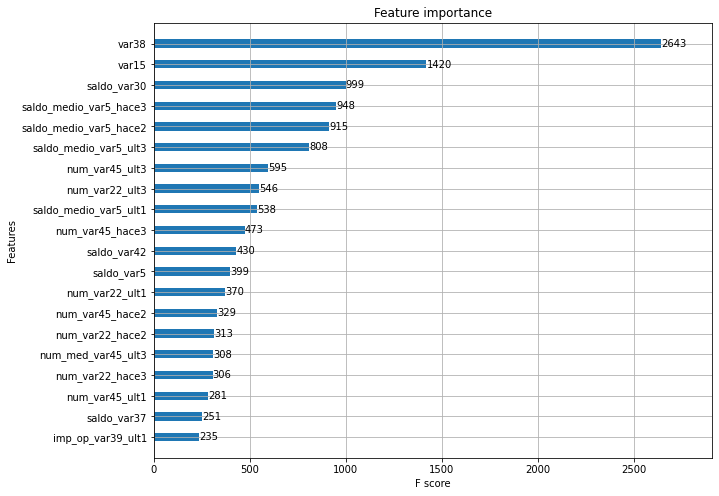

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_model_l, ax=ax, max_num_features=20, height=0.4)